<a href="https://colab.research.google.com/github/VIVEK818713/Feature-Engineering/blob/main/4_Function_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Function Transformation
## some ML algorithm work best on normal data. so if you are working on such algorithm then you have to make your data distribution to normal data distribution. How can you do that with the help of some fuction transformation like--
## log transformation
## reciprocal transformation
## squre transformation--power transformation
## squre root transformation--power transformation
## box-cox transformation
## yeo-jonson transformation
## your custom transformation

## you can use any transformation but end goel is this you should have normal ditribution of data or close to normal distribution.
## sklearn libarary have basic 3 type of mathemetical transformation--
##1. function transformer-->log transformer,reciprocal transformer,squre/squre root transformer,custom function(you can create your transformer)
##2. power transformer-->box-cox transformer,yeo-johnson transformer
##3. Quantile transformer(rarele used)


# How to find if data is normal?
## if i have a data then how can i find its ditribution is normal or not?
##1. Use sns.distplot() visulaization.
##2. use pandas skew function pd.skew(). its value is 0 then distribution is normal , if it is -ve or +ve then your data is skewed.
##3. you can use QQ Plot. it is very relibale method to check whether our data is normal ditributed or not.
## lets understand QQ plot how it is looklike

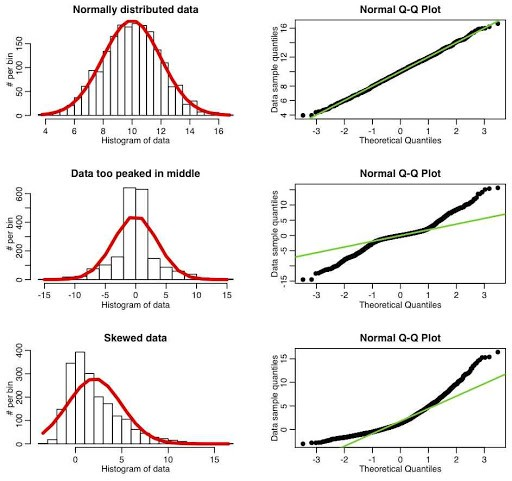

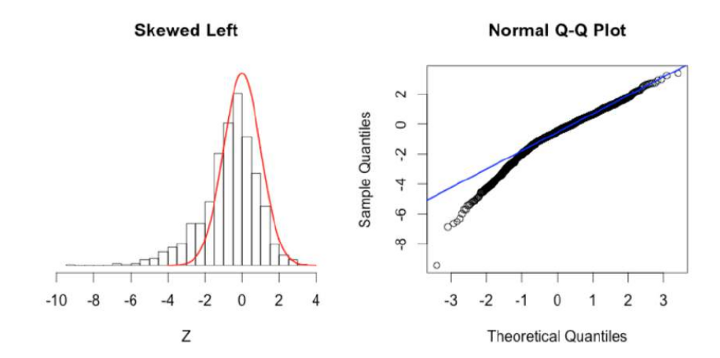

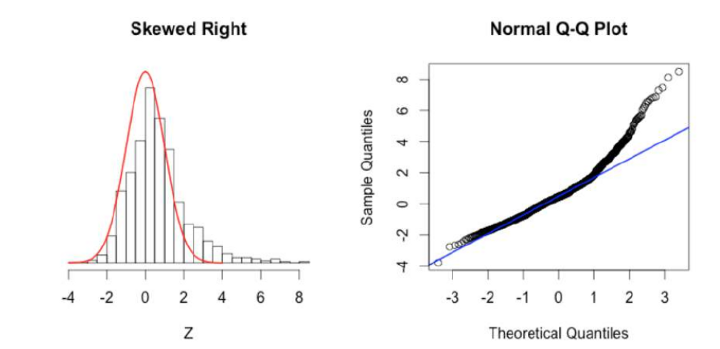

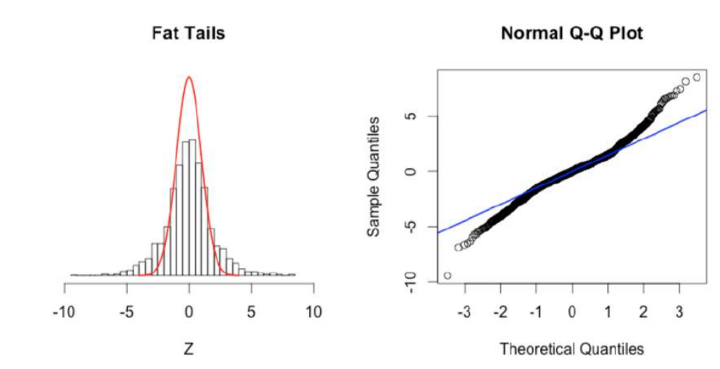

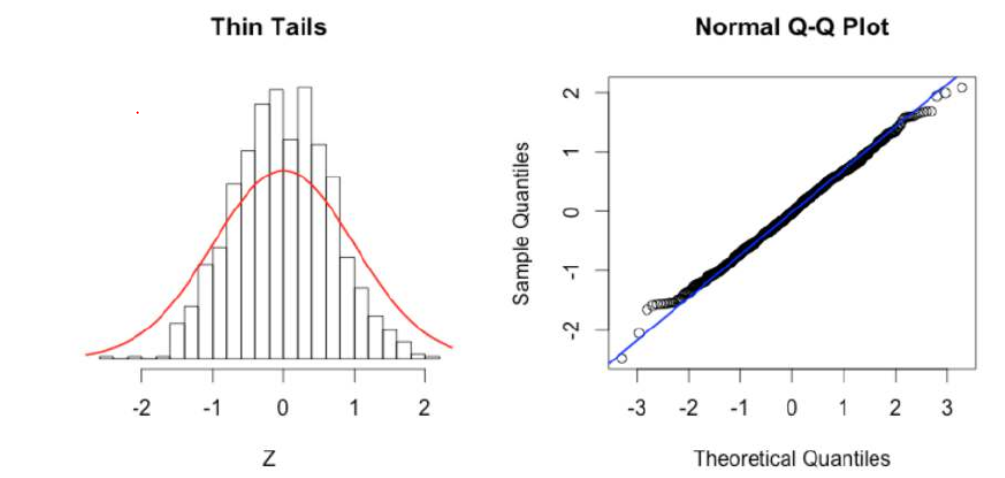

## So lets discuss some transforms
## **Log Transform**--if you want to do log transfrom on any data then you have to take log of each value in that paritcular column.you can take base 2 or base 10 it depends upon you.
## By taking log your data will be normally distributed
## When to use log transform-
## * you should not use log transform on -ve values because you can not take log of -ve values
## * if you have right skewed data then you should use log transform .(you can try it on linear regression or logistic regression) 

## **Reciprocal Transform(1/x)**--it transform small value to large value and large value to the small value.
## **squre(x2)**--it is used basically for the left skewed data.
## **squre root**--
## so there are many transform you have to check all of them in your work and check which is performing best on your data.

## To understand these transform we will take titanic dataset and take only 3 columns for understanding.

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Colab Notebooks/Kaggle json'

In [ ]:
!kaggle datasets download -d hesh97/titanicdataset-traincsv

In [ ]:
! unzip /content/titanicdataset-traincsv.zip

In [ ]:
df=pd.read_csv('/content/train.csv')
df.head()

##we will try logistic regression and decision tree algorithm and check the function transform increase or decrease the accuracy.
##lets import the needed libraries

In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

##To understand Function transform we are taking only 3 columns namely 'Age','Fare','Survived'

In [ ]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

##check weather these columns have missing values or not

In [ ]:
df.isnull().sum()

##there are missing values in age column so we fill this missing value by mean of age column

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

##now spilt your data into X(dependant ) y(independant) variable.

In [ ]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

##Now split the data into Xtrain Xtest ytrain ytest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##Now check the distribution of 'AGE' and 'FARE'

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

##AGE distribution is almost normal.
##now check Fare

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

##Fare column distribution is not normal as you you observe it is right skewed.
##Now apply Logistic regression and Decision tree algorithm before Apply function transform. we will observe the output and after that we will apply function transform and then observe the result.

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

##if you observe the accuracy before applying function transform(log transform) logistic regression gives 64% and decision tree gives 67%.

##Now apply the log transform and check weather the accuracy is impoved or not


In [ ]:
trf = FunctionTransformer(func=np.log1p)

## Above we have call FunctionTransformer and pass first parameter func . func can be any mathemetical function like log,reciprocal , squre, squreroot or your custom function.
## here we take log1p instead of log. Because if in any value x have 0 value then log will not perform well so we will use log1p . log1p add 1 in value of x. then take log.
## But if your data does not contain 0 values then you can choose log also.

In [ ]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

##we have applied the transform .now do the same step as we done before on the algorithm and check the accuarcy.

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

##if you observed that logistic regression improve the accuarcy but Decision tree is almost same as before.Beacuse there are some certain algorithm which do not care about the data is normalized or not , Decision Tree one of them.
##your accuracy is improved but you should check it weather is it true or not by the help of cross validation. Because when you get the result using train test split then it is not so validate so always try to check with cross validation.

In [ ]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

##the result shows that improvement is there.let's see in realty improvement happen or not. for this we will plot the QQ plot before and after log transformation.

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

##if you observe that now Fare QQ plot improve after apply the log transform.

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

##But AGE QQ plot is not good now after apply the log transform.Because this column was not right skewed that's why result is not so good.we apply log transform on it just for understanding purpose.
##now what we will do we apply log transform on FARE column only and check the result.

In [ ]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

##check for cross validation

In [ ]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

## after taking FARE our accuarcy is almost same but we are thinking that our accuarcy should be improved after this. well its ok for the undersatnding purpose.
## now check for other transform like reciprocal, squre, squrerroot... 

In [ ]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

##we donot apply any transformation then the plot will be same. and we are working on only FARE columns

In [ ]:
apply_transform(lambda x: x)

##squre transform:

In [ ]:
apply_transform(lambda x:x**2)

##in squre transform the result is going down because you know this data is right skewed . yes if this data was left skewed then may be result goes good.
##apply squre root

In [ ]:
apply_transform(lambda x:x**1/2)

##apply reciprocal

In [ ]:
apply_transform(lambda x:1/x)

##plot is giving error may be we have 0 value some where so we will add some value to x

In [ ]:
apply_transform(lambda x:1/(x+0.1))

In [ ]:
apply_transform(np.sin)

##so now you should take any data and apply function transform on it and check how these are working in your case.

#Power Transform

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy.stats as stats

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

## for data set click on the link
##https://www.kaggle.com/datasets/elikplim/concrete-compressive-strength-data-set

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Colab Notebooks/Kaggle json'

In [ ]:
!kaggle datasets download -d elikplim/concrete-compressive-strength-data-set

In [ ]:
!unzip /content/concrete-compressive-strength-data-set.zip

In [ ]:
df = pd.read_csv('/content/concrete_data.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [ ]:
X = df.drop(columns=['concrete_compressive_strength'])
y = df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Applying Regression without any transformation

In [ ]:

lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

# Cross checking with cross val score

In [ ]:

lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

# Plotting the distplots without any transformation


In [ ]:

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()


# Applying Box-Cox Transform

In [ ]:
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

# Applying linear regression on transformed data


In [ ]:
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

# Using cross val score

In [ ]:
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

# Before and after comparision for Box-Cox Plot

In [ ]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

# Apply Yeo-Johnson transform

In [ ]:
pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

# applying cross val score

In [ ]:
pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

In [ ]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

# Before and after comparision for Yeo-Johnson

In [ ]:
for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed2[col])
    plt.title(col)

    plt.show()

# Side by side Lambdas

In [ ]:
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})